In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as osp
from data_to_csv import *
import utils
import logging
import itertools
import pyupset as pyu
import locale
from contextlib import contextmanager
from datetime import date, timedelta, datetime
from matplotlib.ticker import MaxNLocator

2019-05-20 01:12:47,663 - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [3]:
sns.set()

conf = {
    'font.size': 14.0,
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.edgecolor': 'black',
    'axes.facecolor': '#E5E5EF',
#    'axes.facecolor': '#E0E0EF',
    'axes.labelcolor': 'black',
    'axes.titlesize': 15.6,
    'axes.labelsize': 'large',    
    'figure.figsize': (12, 7),
    'figure.titlesize': 'x-large',
    'grid.linewidth': 1.3,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'legend.fontsize': 'large',
}

plt.rcParams.update(conf)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
df_scitani = pd.read_csv(r'E:\Projects\facebook_feeds\phantombuster_members\scitani.csv')
df_seznamka = pd.read_csv(r'E:\Projects\facebook_feeds\phantombuster_members\seznamka.csv')
df_world = pd.read_csv(r'E:\Projects\facebook_feeds\phantombuster_members\world.csv')
df_coven = pd.read_csv(r'E:\Projects\facebook_feeds\phantombuster_members\monarchy.csv')
df_maniaci = pd.read_csv(r'E:\Projects\facebook_feeds\phantombuster_members\monarchy.csv')

In [6]:
df_scitani['group'] = 'scitani'
df_seznamka['group'] = 'seznamka'
df_world['group'] = 'world'
df_coven['group'] = 'coven'
df_maniaci['group'] = 'maniaci'

In [7]:
#df = pd.concat((df_scitani, df_seznamka, df_world, df_coven))
df = pd.concat((df_scitani, df_seznamka, df_world, df_maniaci))


In [8]:
df['id'] = df['profileUrl'].fillna('') + df['uid']

In [9]:
#df = df[df['member_since_dt'].dt.year < 2019]  # 2019 is not over yet, excluding them from calculations so plots are nice

In [10]:
df_groups = df.groupby(by='id')['group'].agg(lambda x: ', '.join(x))
df_groups.head()

id
/ajax/browser/list/group_confirmed_members/100000287414520    scitani
100000004851076                                               scitani
100000108704374                                               scitani
100000157112172                                               scitani
100000201253471                                               scitani
Name: group, dtype: object

In [11]:
df_scitani.describe()

profileUrl   uid  \
count                                      9429  9909   
unique                                     9429  9907   
top     https://www.facebook.com/zuzka.klackova   id=   
freq                                          1     3   

                                           profilePicture         name  \
count                                                9909         9909   
unique                                               9353         9789   
top     https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Jakub Novák   
freq                                                  305            4   

       firstName lastName                            groupName  \
count       9909     9879                                 9909   
unique      2834     8015                                    1   
top        Jakub     Chan  Sčítání českých a slovenských otaku   
freq         228       37                                 9909   

                                                groupUrl  \
count                                               9909   
unique                                                 1   
top     https://www.facebook.com/groups/135384786514720/   
freq                                                9909   

                                  memberSince additionalData  \
count                                    9418            726   
unique                                   3574            624   
top     Přidán Davidem Svobodou 26. září 2016          Praha   
freq                                       92             19   

                       timestamp    group  
count                       9909     9909  
unique                      9881        1  
top     2019-05-08T10:37:44.844Z  scitani  
freq                          22     9909

In [12]:
df_seznamka.describe()

profileUrl   uid  \
count                                7637  7637   
unique                               7637  7633   
top     https://www.facebook.com/mysak420   id=   
freq                                    1     5   

                                           profilePicture          name  \
count                                                7637          7637   
unique                                               7447          7562   
top     https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  David Nguyen   
freq                                                  139             3   

       firstName lastName          groupName  \
count       7637     7619               7637   
unique      2324     6316                  1   
top       Martin   Nguyen  Otaku seznamka ^^   
freq         187       28               7637   

                                               groupUrl  \
count                                              7637   
unique                                                1   
top     https://www.facebook.com/groups/otaku.seznamka/   
freq                                               7637   

                                   memberSince additionalData  \
count                                     7619            932   
unique                                    4002            763   
top     Přidán Lucií Matouškova 9. června 2017          Praha   
freq                                        81             53   

                       timestamp     group  
count                       7637      7637  
unique                      7593         1  
top     2019-05-08T12:20:05.008Z  seznamka  
freq                          45      7637

In [13]:
df_world.describe()

profileUrl   uid  \
count                                       6210  6210   
unique                                      6210  6206   
top     https://www.facebook.com/adam.schejbal.3   id=   
freq                                           1     5   

                                           profilePicture        name  \
count                                                6210        6210   
unique                                               6073        6165   
top     https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Kaneki Ken   
freq                                                  102           4   

       firstName lastName                groupName  \
count       6209     6195                     6210   
unique      2072     5304                        1   
top       Martin     Chan  Anime World CZ/SK (￣ω￣)   
freq         126       20                     6210   

                                                groupUrl  \
count                                               6210   
unique                                                 1   
top     https://www.facebook.com/groups/118394915494572/   
freq                                                6210   

                         memberSince additionalData                 timestamp  \
count                           6207           2290                      6210   
unique                          1578           1737                      6165   
top     Úterý 5. března 2019 v 21:06          Praha  2019-05-08T12:14:29.554Z   
freq                             116             59                        45   

        group  
count    6210  
unique      1  
top     world  
freq     6210

In [14]:
df_coven.describe()

profileUrl              uid  \
count                                1379             1379   
unique                               1379             1379   
top     https://www.facebook.com/johnyk47  100007590818179   
freq                                    1                1   

                                           profilePicture               name  \
count                                                1379               1379   
unique                                               1366               1375   
top     https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-1/...  Jitka Prochazkova   
freq                                                   13                  2   

       firstName lastName             groupName  \
count       1379     1376                  1379   
unique       655     1300                     1   
top       Michal   Nguyen  ANIME COVEN-MONARCHY   
freq          29        6                  1379   

                                                 groupUrl  \
count                                                1379   
unique                                                  1   
top     https://www.facebook.com/groups/1435080550127641/   
freq                                                 1379   

                           memberSince additionalData  \
count                             1374            216   
unique                             805            201   
top     Čtvrtek 3. května 2018 v 14:24          Praha   
freq                                13             11   

                       timestamp  group  
count                       1379   1379  
unique                      1336      1  
top     2019-05-08T12:07:27.560Z  coven  
freq                          32   1379

In [15]:
df_scitani.head()

profileUrl              uid  \
0           https://www.facebook.com/pepa.uchiha.963  100027736687964   
1                  https://www.facebook.com/johnbeak  100001257474212   
2  https://www.facebook.com/profile.php?id=100006...  100006707255843   
3      https://www.facebook.com/teresaanna.kubienova  100008200213067   
4  https://www.facebook.com/karolina.svobodova.czech  100006507497703   

                                      profilePicture                   name  \
0  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...            Pepa Uchiha   
1  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...              John Beak   
2  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...           Richard Sova   
3  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Teresa Anna Kubienova   
4  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...     Karolína Svobodová   

  firstName        lastName                            groupName  \
0      Pepa          Uchiha  Sčítání českých a slovenských otaku   
1      John            Beak  Sčítání českých a slovenských otaku   
2   Richard            Sova  Sčítání českých a slovenských otaku   
3    Teresa  Anna Kubienova  Sčítání českých a slovenských otaku   
4  Karolína       Svobodová  Sčítání českých a slovenských otaku   

                                           groupUrl  \
0  https://www.facebook.com/groups/135384786514720/   
1  https://www.facebook.com/groups/135384786514720/   
2  https://www.facebook.com/groups/135384786514720/   
3  https://www.facebook.com/groups/135384786514720/   
4  https://www.facebook.com/groups/135384786514720/   

                               memberSince  \
0                   Přidal(a) se v pondělí   
1                    Přidal(a) se v neděli   
2  Přidán Jurajem Velazquez 5. května 2019   
3                    Přidal(a) se v neděli   
4                Přidal(a) se minulý pátek   

                                      additionalData  \
0                                                NaN   
1           Software Developer ve společnosti Notino   
2                                                NaN   
3  Pracuje ve společnosti Škola čar a kouzel v Br...   
4        Pracuje ve společnosti Lina Freedom Cosplay   

                  timestamp    group  
0  2019-05-08T10:37:44.843Z  scitani  
1  2019-05-08T10:37:44.843Z  scitani  
2  2019-05-08T10:37:44.843Z  scitani  
3  2019-05-08T10:37:44.843Z  scitani  
4  2019-05-08T10:37:44.843Z  scitani

### sanitizing members arrival to group

In [16]:
df['memberSince'].unique().tolist()

['Přidal(a) se v pondělí',
 'Přidal(a) se v neděli',
 'Přidán Jurajem Velazquez 5. května 2019',
 'Přidal(a) se minulý pátek',
 'Přidal(a) se minulý čtvrtek',
 'Přidal(a) se minulou středu',
 'Přidal(a) se asi před týdnem',
 'Přidal(a) se asi před 2 týd.',
 'Přidán Ľubomírem Mihalikem 26. dubna 2019',
 'Přidána Apolenou Gray 19. dubna 2019',
 'Přidal(a) se asi před 3 týd.',
 'Středa 17. dubna 2019 v 18:47',
 'Středa 17. dubna 2019 v 13:11',
 'Středa 17. dubna 2019 v 12:22',
 'Středa 17. dubna 2019 v 12:19',
 'Středa 17. dubna 2019 v 12:17',
 'Úterý 16. dubna 2019 v 19:18',
 'Úterý 16. dubna 2019 v 15:56',
 'Pondělí 15. dubna 2019 v 9:11',
 'Čtvrtek 11. dubna 2019 v 18:33',
 'Čtvrtek 11. dubna 2019 v 8:33',
 'Středa 10. dubna 2019 v 11:45',
 'Úterý 9. dubna 2019 v 19:37',
 'Úterý 9. dubna 2019 v 19:01',
 'Úterý 9. dubna 2019 v 18:58',
 'Úterý 9. dubna 2019 v 18:45',
 'Pondělí 8. dubna 2019 v 20:09',
 'Pondělí 8. dubna 2019 v 16:29',
 'Neděle 7. dubna 2019 v 21:44',
 'Neděle 7. dubna 201

In [17]:
download_day = date(year=2019, month=5, day=8) # to calculate relative addings

@contextmanager
def setlocale(name):
    saved = locale.setlocale(locale.LC_ALL)
    try:
        yield locale.setlocale(locale.LC_ALL, name)
    finally:
        locale.setlocale(locale.LC_ALL, saved)

def str_to_timestamp(string):
    # relative dates
    if isinstance(string, float) and np.isnan(string):
        return download_day
    if string.startswith('Přidal(a) se'):
        day_string = string.replace('Přidal(a) se ', '')
        if day_string.startswith('v') or day_string.startswith('minul'):
            day_to_datetime = {'pondělí': 0, 'úterý': 1, 'středu': 2, 'čtvrtek': 3, 'pátek': 4, 'sobotu': 5, 'neděli': 6}
            if day_string.startswith('v'):
                day_string = day_string.replace('v ', '')
                days_shift = 0
            elif day_string.startswith('minul'):
                day_string = day_string.split(' ', 1)[1]
                days_shift = -7
            days_shift += day_to_datetime[day_string] - download_day.weekday()
            if days_shift >= 0:
                days_shift -= 7
            return download_day + timedelta(days=days_shift)
        elif day_string.startswith('asi před'):
            day_string = day_string.replace('asi před ', '')
            week_to_datetime = {'týdnem': 1, '2 týd.': 2, '3 týd.': 3, 'měsícem': 4}
            return download_day - timedelta(weeks=week_to_datetime[day_string])
        elif day_string.startswith('před') and 'měs' in day_string:
            day_string = day_string.replace('před ', '')
            week_to_datetime = {'2 měs.': 8, '3 měs.': 12}
            return download_day - timedelta(weeks=week_to_datetime[day_string])
        elif day_string.startswith('před') and day_string.endswith('hod'):
            hours_string = day_string.replace('před ', '').replace(' hod', '')
            hours = int(hours_string)
            return download_day - timedelta(hours=hours)
    elif string.startswith('Přidán'):
        if 'včera' in string:
            return download_day - timedelta(days=1)
        else:
            #print(string.split(' ')[-3:])
            date_str = ' '.join(string.split(' ')[-3:])
            normalize_dict = {'ledna': 'leden', 'února': 'únor', 'března': 'březen', 'dubna': 'duben', 'května': 'květen', 'června': 'červen', 'července': 'červenec', 'srpna': 'srpen', 
                              'října': 'říjen', 'listopadu': 'listopad', 'prosince': 'prosinec'}
            for key, value in normalize_dict.items():
                date_str = date_str.replace(key, value)
            with setlocale('cs_CZ'):
                return datetime.strptime(date_str, '%d. %B %Y')
    elif string.startswith('Zobrazování') or string.startswith('Skupina byla'):
        return None  # so I can exclude them before plotting
    normalize_dict = {'ledna': 'leden', 'února': 'únor', 'března': 'březen', 'dubna': 'duben', 'května': 'květen', 'června': 'červen', 'července': 'červenec', 'srpna': 'srpen', 
                        'října': 'říjen', 'listopadu': 'listopad', 'prosince': 'prosinec'}
    for key, value in normalize_dict.items():
        string = string.replace(key, value)
    with setlocale('cs_CZ'):
        return datetime.strptime(string, '%A %d. %B %Y v %H:%M')
        
    raise Exception(string)

In [18]:
alllocale = locale.locale_alias
for k in alllocale.keys():
    print('locale[%s] %s' % (k, alllocale[k]))


locale[a3] az_AZ.KOI8-C
locale[a3_az] az_AZ.KOI8-C
locale[a3_az.koic] az_AZ.KOI8-C
locale[aa_dj] aa_DJ.ISO8859-1
locale[aa_er] aa_ER.UTF-8
locale[aa_et] aa_ET.UTF-8
locale[af] af_ZA.ISO8859-1
locale[af_za] af_ZA.ISO8859-1
locale[agr_pe] agr_PE.UTF-8
locale[ak_gh] ak_GH.UTF-8
locale[am] am_ET.UTF-8
locale[am_et] am_ET.UTF-8
locale[american] en_US.ISO8859-1
locale[an_es] an_ES.ISO8859-15
locale[anp_in] anp_IN.UTF-8
locale[ar] ar_AA.ISO8859-6
locale[ar_aa] ar_AA.ISO8859-6
locale[ar_ae] ar_AE.ISO8859-6
locale[ar_bh] ar_BH.ISO8859-6
locale[ar_dz] ar_DZ.ISO8859-6
locale[ar_eg] ar_EG.ISO8859-6
locale[ar_in] ar_IN.UTF-8
locale[ar_iq] ar_IQ.ISO8859-6
locale[ar_jo] ar_JO.ISO8859-6
locale[ar_kw] ar_KW.ISO8859-6
locale[ar_lb] ar_LB.ISO8859-6
locale[ar_ly] ar_LY.ISO8859-6
locale[ar_ma] ar_MA.ISO8859-6
locale[ar_om] ar_OM.ISO8859-6
locale[ar_qa] ar_QA.ISO8859-6
locale[ar_sa] ar_SA.ISO8859-6
locale[ar_sd] ar_SD.ISO8859-6
locale[ar_ss] ar_SS.UTF-8
locale[ar_sy] ar_SY.ISO8859-6
locale[ar_tn] ar_TN.ISO8

In [19]:
[(i, str_to_timestamp(i)) for i in df[df['memberSince'].notnull()]['memberSince'].unique()]

[('Přidal(a) se v pondělí', datetime.date(2019, 5, 6)),
 ('Přidal(a) se v neděli', datetime.date(2019, 5, 5)),
 ('Přidán Jurajem Velazquez 5. května 2019',
  datetime.datetime(2019, 5, 5, 0, 0)),
 ('Přidal(a) se minulý pátek', datetime.date(2019, 5, 3)),
 ('Přidal(a) se minulý čtvrtek', datetime.date(2019, 5, 2)),
 ('Přidal(a) se minulou středu', datetime.date(2019, 5, 1)),
 ('Přidal(a) se asi před týdnem', datetime.date(2019, 5, 1)),
 ('Přidal(a) se asi před 2 týd.', datetime.date(2019, 4, 24)),
 ('Přidán Ľubomírem Mihalikem 26. dubna 2019',
  datetime.datetime(2019, 4, 26, 0, 0)),
 ('Přidána Apolenou Gray 19. dubna 2019',
  datetime.datetime(2019, 4, 19, 0, 0)),
 ('Přidal(a) se asi před 3 týd.', datetime.date(2019, 4, 17)),
 ('Středa 17. dubna 2019 v 18:47', datetime.datetime(2019, 4, 17, 18, 47)),
 ('Středa 17. dubna 2019 v 13:11', datetime.datetime(2019, 4, 17, 13, 11)),
 ('Středa 17. dubna 2019 v 12:22', datetime.datetime(2019, 4, 17, 12, 22)),
 ('Středa 17. dubna 2019 v 12:19', d

In [20]:
with setlocale('cs_CZ'):
    display(download_day.weekday(), download_day, download_day.strftime('%A'), download_day.strftime('%d. %B %Y'))
    display(datetime.strptime('5. květen 2019', '%d. %B %Y'))

2

datetime.date(2019, 5, 8)

'středa'

'08. květen 2019'

datetime.datetime(2019, 5, 5, 0, 0)

In [21]:
df['member_since_dt'] = df['memberSince'].apply(str_to_timestamp)

In [22]:
df.describe()

profileUrl    uid  \
count                                   24655  25135   
unique                                  20273  20740   
top     https://www.facebook.com/tomas.kuma.1    id=   
freq                                        4     14   
first                                     NaN    NaN   
last                                      NaN    NaN   

                                           profilePicture       name  \
count                                               25135      25135   
unique                                              20763      20354   
top     https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Zoe Black   
freq                                                  546          6   
first                                                 NaN        NaN   
last                                                  NaN        NaN   

       firstName lastName                            groupName  \
count      25134    25069                                25135   
unique      4964    15391                                    4   
top       Martin     Chan  Sčítání českých a slovenských otaku   
freq         563       79                                 9909   
first        NaN      NaN                                  NaN   
last         NaN      NaN                                  NaN   

                                                groupUrl  \
count                                              25135   
unique                                                 4   
top     https://www.facebook.com/groups/135384786514720/   
freq                                                9909   
first                                                NaN   
last                                                 NaN   

                         memberSince additionalData                 timestamp  \
count                          24618           4164                     25135   
unique                          9943           2725                     24975   
top     Úterý 5. března 2019 v 21:06          Praha  2019-05-08T12:20:05.008Z   
freq                             116            142                        45   
first                            NaN            NaN                       NaN   
last                             NaN            NaN                       NaN   

          group                                                 id  \
count     25135                                              25135   
unique        4                                              20754   
top     scitani  https://www.facebook.com/Varg.the.atheist10000...   
freq       9909                                                  4   
first       NaN                                                NaN   
last        NaN                                                NaN   

            member_since_dt  
count                 25123  
unique                 3824  
top     2019-05-08 00:00:00  
freq                    519  
first   2014-04-26 00:00:00  
last    2019-05-08 00:00:00

In [23]:
df.head()

profileUrl              uid  \
0           https://www.facebook.com/pepa.uchiha.963  100027736687964   
1                  https://www.facebook.com/johnbeak  100001257474212   
2  https://www.facebook.com/profile.php?id=100006...  100006707255843   
3      https://www.facebook.com/teresaanna.kubienova  100008200213067   
4  https://www.facebook.com/karolina.svobodova.czech  100006507497703   

                                      profilePicture                   name  \
0  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...            Pepa Uchiha   
1  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...              John Beak   
2  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...           Richard Sova   
3  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Teresa Anna Kubienova   
4  https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...     Karolína Svobodová   

  firstName        lastName                            groupName  \
0      Pepa          Uchiha  Sčítání českých a slovenských otaku   
1      John            Beak  Sčítání českých a slovenských otaku   
2   Richard            Sova  Sčítání českých a slovenských otaku   
3    Teresa  Anna Kubienova  Sčítání českých a slovenských otaku   
4  Karolína       Svobodová  Sčítání českých a slovenských otaku   

                                           groupUrl  \
0  https://www.facebook.com/groups/135384786514720/   
1  https://www.facebook.com/groups/135384786514720/   
2  https://www.facebook.com/groups/135384786514720/   
3  https://www.facebook.com/groups/135384786514720/   
4  https://www.facebook.com/groups/135384786514720/   

                               memberSince  \
0                   Přidal(a) se v pondělí   
1                    Přidal(a) se v neděli   
2  Přidán Jurajem Velazquez 5. května 2019   
3                    Přidal(a) se v neděli   
4                Přidal(a) se minulý pátek   

                                      additionalData  \
0                                                NaN   
1           Software Developer ve společnosti Notino   
2                                                NaN   
3  Pracuje ve společnosti Škola čar a kouzel v Br...   
4        Pracuje ve společnosti Lina Freedom Cosplay   

                  timestamp    group  \
0  2019-05-08T10:37:44.843Z  scitani   
1  2019-05-08T10:37:44.843Z  scitani   
2  2019-05-08T10:37:44.843Z  scitani   
3  2019-05-08T10:37:44.843Z  scitani   
4  2019-05-08T10:37:44.843Z  scitani   

                                                  id member_since_dt  
0  https://www.facebook.com/pepa.uchiha.963100027...      2019-05-06  
1   https://www.facebook.com/johnbeak100001257474212      2019-05-05  
2  https://www.facebook.com/profile.php?id=100006...      2019-05-05  
3  https://www.facebook.com/teresaanna.kubienova1...      2019-05-05  
4  https://www.facebook.com/karolina.svobodova.cz...      2019-05-03

In [24]:
df.dtypes

profileUrl                 object
uid                        object
profilePicture             object
name                       object
firstName                  object
lastName                   object
groupName                  object
groupUrl                   object
memberSince                object
additionalData             object
timestamp                  object
group                      object
id                         object
member_since_dt    datetime64[ns]
dtype: object

## examining intersections

In [25]:
def members_in_groups(df, groups):
    filters = df['group'] == groups[0]
    for group in groups[1:]:
        filters |= (df['group'] == group)
    return (df[filters].groupby(by='id')['group'].count() == len(groups)).sum()

def members_str_groups(df, groups, excluded = []):
    filters = df.str.contains(groups[0])
    for group in groups[1:]:
        filters &= df.str.contains(group)
    for excl in excluded:
        filters &= ~df.str.contains(excl)
    return df[filters].count()


In [26]:
(df[(df['group'] == 'scitani') | (df['group'] == 'seznamka')].groupby(by='id')['group'].count() == 2).sum()

2194

In [27]:
members_in_groups(df, ('scitani', 'seznamka'))

2194

In [28]:
(df[(df['group'] == 'scitani') | (df['group'] == 'coven')].groupby(by='id')['group'].count() == 2).sum()

0

In [29]:
members_in_groups(df, ('scitani', 'coven'))

0

In [30]:
for pair in itertools.combinations(df['group'].unique(), 1):
    print(pair, (df[(df['group'] == pair[0])].groupby(by='id')['group'].count() == 1).sum())
    

('scitani',) 9909
('seznamka',) 7637
('world',) 6210
('maniaci',) 1379


In [31]:
for pair in itertools.combinations(df['group'].unique(), 2):
    print(pair, (df[(df['group'] == pair[0]) | (df['group'] == pair[1])].groupby(by='id')['group'].count() == 2).sum())
    

('scitani', 'seznamka') 2194
('scitani', 'world') 1021
('scitani', 'maniaci') 528
('seznamka', 'world') 640
('seznamka', 'maniaci') 506
('world', 'maniaci') 259


In [32]:
for pair in itertools.combinations(df['group'].unique(), 2):
    print(pair, (df[(df['group'] == pair[0]) | (df['group'] == pair[1])].groupby(by='id')['group'].count() >= 2).sum())
    

('scitani', 'seznamka') 2194
('scitani', 'world') 1021
('scitani', 'maniaci') 528
('seznamka', 'world') 640
('seznamka', 'maniaci') 506
('world', 'maniaci') 259


In [33]:
for pair in itertools.combinations(df['group'].unique(), 3):
    print(pair, (df[(df['group'] == pair[0]) | (df['group'] == pair[1]) | (df['group'] == pair[2])].groupby(by='id')['group'].count() == 3).sum())
    

('scitani', 'seznamka', 'world') 319
('scitani', 'seznamka', 'maniaci') 283
('scitani', 'world', 'maniaci') 135
('seznamka', 'world', 'maniaci') 106


In [34]:
for pair in itertools.combinations(df['group'].unique(), 4):
    print(pair, (df[(df['group'] == pair[0]) | (df['group'] == pair[1]) | (df['group'] == pair[2]) | (df['group'] == pair[3])].groupby(by='id')['group'].count() == 4).sum())
    

('scitani', 'seznamka', 'world', 'maniaci') 76


In [35]:
datasets = dict()
for group in df['group'].unique():
    temp_df = df[df['group'] == group]['id'].to_frame()
    temp_df['size'] = 1
    datasets[group] = temp_df

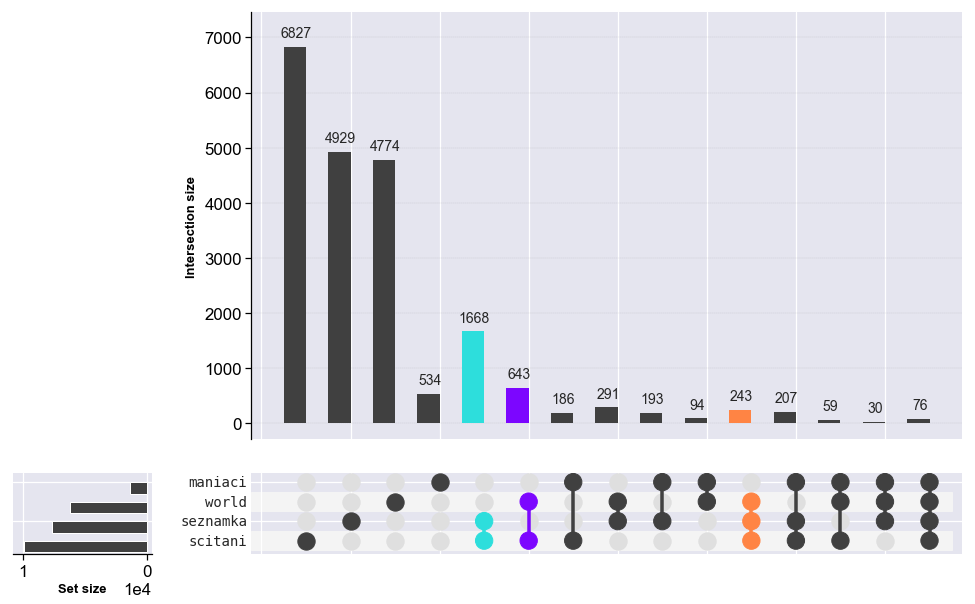

In [36]:
res = pyu.plot(datasets, unique_keys=['id'], sort_by='degree', 
         query = [('scitani', 'world'), ('scitani', 'coven'), ('scitani', 'seznamka'), 
                  ('scitani', 'seznamka', 'coven'), ('scitani', 'coven', 'world'), ('scitani', 'seznamka', 'world'), 
                  ('scitani', 'seznamka', 'world', 'coven')])


In [37]:
534+186+193+94+207+59+30+76

1379

In [38]:
df_no_coven = df[df['group'] != 'coven']

In [39]:
df_no_coven.describe()

profileUrl    uid  \
count                                   24655  25135   
unique                                  20273  20740   
top     https://www.facebook.com/tomas.kuma.1    id=   
freq                                        4     14   
first                                     NaN    NaN   
last                                      NaN    NaN   

                                           profilePicture       name  \
count                                               25135      25135   
unique                                              20763      20354   
top     https://scontent-sea1-1.xx.fbcdn.net/v/t1.0-1/...  Zoe Black   
freq                                                  546          6   
first                                                 NaN        NaN   
last                                                  NaN        NaN   

       firstName lastName                            groupName  \
count      25134    25069                                25135   
unique      4964    15391                                    4   
top       Martin     Chan  Sčítání českých a slovenských otaku   
freq         563       79                                 9909   
first        NaN      NaN                                  NaN   
last         NaN      NaN                                  NaN   

                                                groupUrl  \
count                                              25135   
unique                                                 4   
top     https://www.facebook.com/groups/135384786514720/   
freq                                                9909   
first                                                NaN   
last                                                 NaN   

                         memberSince additionalData                 timestamp  \
count                          24618           4164                     25135   
unique                          9943           2725                     24975   
top     Úterý 5. března 2019 v 21:06          Praha  2019-05-08T12:20:05.008Z   
freq                             116            142                        45   
first                            NaN            NaN                       NaN   
last                             NaN            NaN                       NaN   

          group                                                 id  \
count     25135                                              25135   
unique        4                                              20754   
top     scitani  https://www.facebook.com/Varg.the.atheist10000...   
freq       9909                                                  4   
first       NaN                                                NaN   
last        NaN                                                NaN   

            member_since_dt  
count                 25123  
unique                 3824  
top     2019-05-08 00:00:00  
freq                    519  
first   2014-04-26 00:00:00  
last    2019-05-08 00:00:00

In [40]:
df_no_coven.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378],
           dtype='int64', length=25135)

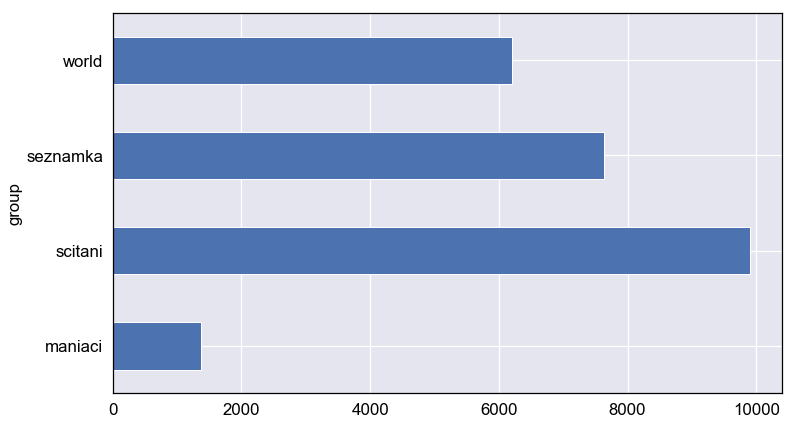

In [41]:
df.groupby('group')['id'].count().plot.barh()

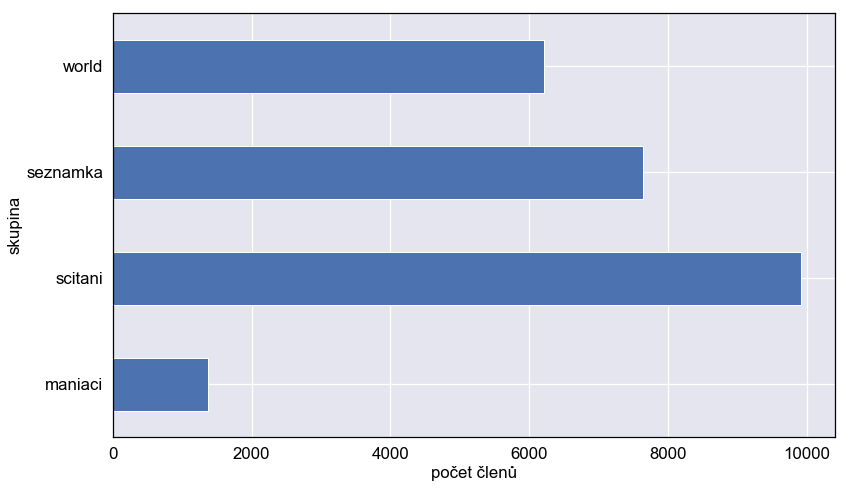

In [42]:
df_no_coven.groupby('group')['id'].count().plot.barh()
plt.ylabel('skupina')
plt.xlabel('počet členů')
plt.tight_layout()
plt.savefig('imgs/3skupin-pocty.png')

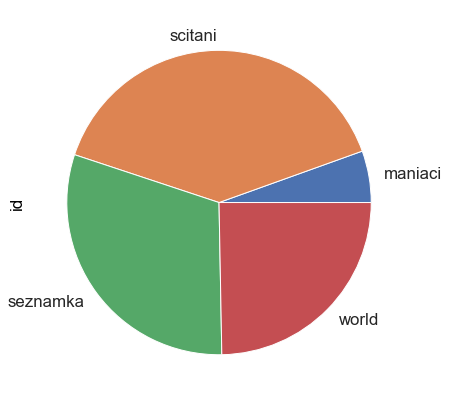

In [43]:
df.groupby('group')['id'].count().plot.pie()

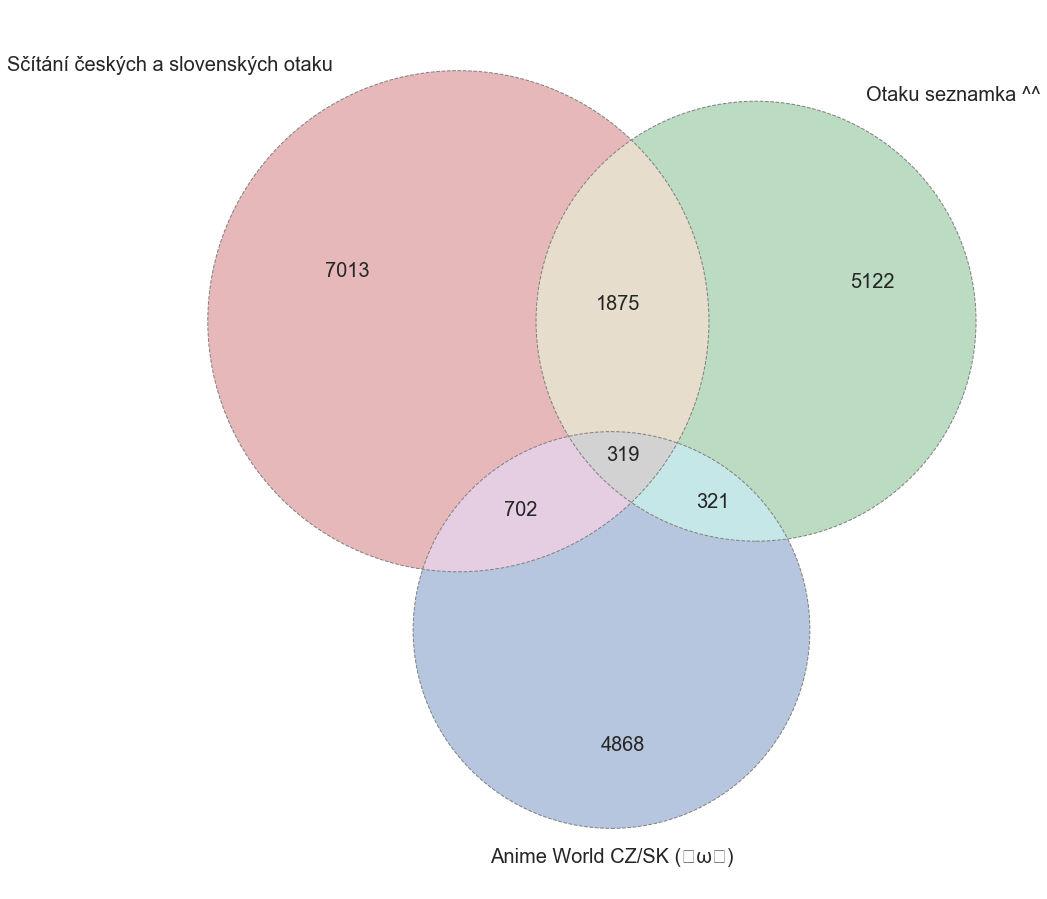

In [44]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
 
# by documentation: (Abc, aBc, ABc, abC, AbC, aBC, ABC)
# Custom text labels: change the label of group A
plt.figure(figsize=(15, 15))
subsets = (members_str_groups(df_groups, ('scitani',), ('world', 'seznamka')), members_str_groups(df_groups, ('seznamka',), ('scitani', 'world')), members_str_groups(df_groups, ('scitani', 'seznamka'), ('world',)), 
           members_str_groups(df_groups, ('world',), ('scitani', 'seznamka')), members_str_groups(df_groups, ('scitani', 'world'), ('seznamka',)), members_str_groups(df_groups, ('seznamka', 'world'), ('scitani',)), 
           members_str_groups(df_groups, ('scitani', 'seznamka', 'world')))
#subsets = (7013, 5122, 1875, 4868, 702, 321, 319)
#subsets = (7013, 5122, 1875, 4868, 702, 321, 1)
v=venn3(subsets=subsets, set_labels=('Sčítání českých a slovenských otaku', 'Otaku seznamka ^^', 'Anime World CZ/SK (￣ω￣)'))
c=venn3_circles(subsets=subsets, linestyle='dashed', linewidth=1, color="grey")
for text in v.set_labels:
    text.set_fontsize(20)
for text in v.subset_labels:
    text.set_fontsize(20)
#v.get_label_by_id('A').set_text('My Favourite group!')
plt.tight_layout()
plt.savefig('imgs/venn_diagram.png')
plt.show()


In [45]:
subsets

(7013, 5122, 1875, 4868, 702, 321, 319)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
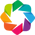

source  target  value
0       1       0      1
1       2       0      8
2       3       0     10

In [46]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)
links = pd.DataFrame(data['links'])
links.head(3)

In [47]:
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
nodes.data.head()

index  group             name
0      0      1           Myriel
1      1      1         Napoleon
2      2      1  Mlle.Baptistine
3      3      1     Mme.Magloire
4      4      1     CountessdeLo

In [48]:
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Set2', edge_cmap='Set1', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [49]:
df_les = pd.DataFrame(data['nodes'])
df_les.head()

group             name
0      1           Myriel
1      1         Napoleon
2      1  Mlle.Baptistine
3      1     Mme.Magloire
4      1     CountessdeLo

In [50]:
df_les[df_les['name'].str.contains('Valjean')]

group     name
11      2  Valjean

In [51]:
df_for_hv = df.groupby(by='group')['id'].count()
#df_for_hv = df['group'].unique()
#df_for_hv['id_cat'] = df_for_hv['id'].astype('category')
#df_for_hv['index'] = df_for_hv['id_cat'].cat.codes
#df_for_hv = df_for_hv[['index', 'group']]
#nodes = hv.Dataset(df_for_hv, 'index')

nodes = hv.Dataset(df_for_hv, 'group')
nodes.data.head()

group    id
0   maniaci  1379
1   scitani  9909
2  seznamka  7637
3     world  6210

In [52]:
pairs = []
for pair in itertools.combinations(df['group'].unique(), 2):
    pairs.append([pair[0], pair[1], members_str_groups(df_groups, pair)])
for pair in itertools.combinations(df['group'].unique(), 1):
    pairs.append([pair[0], pair[0], members_str_groups(df_groups, pair, set(df['group'].unique()) - {pair[0]})])

links = pd.DataFrame(pairs, columns=['source', 'target', 'value'])
links

source    target  value
0   scitani  seznamka   2194
1   scitani     world   1021
2   scitani   maniaci    528
3  seznamka     world    640
4  seznamka   maniaci    506
5     world   maniaci    259
6   scitani   scitani   6827
7  seznamka  seznamka   4929
8     world     world   4774
9   maniaci   maniaci    534

In [53]:
df_for_hv.head()

group
maniaci     1379
scitani     9909
seznamka    7637
world       6210
Name: id, dtype: int64

In [54]:
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
               labels='group', node_color=dim('group').str()))

:Chord   [source,target]   (value)

### timelines of people joining groups

In [55]:
first_joined = df[df['member_since_dt'].notnull()].sort_values('member_since_dt').groupby('id').first()
first_joined = first_joined.set_index('member_since_dt')

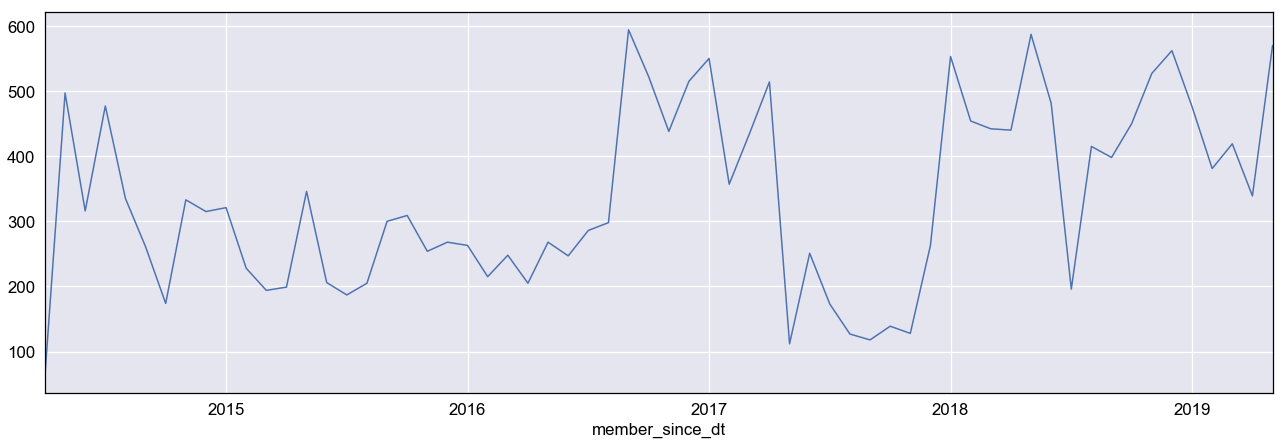

In [56]:
first_joined.groupby(pd.Grouper(freq='M'))['uid'].count().plot(figsize=(22, 7))

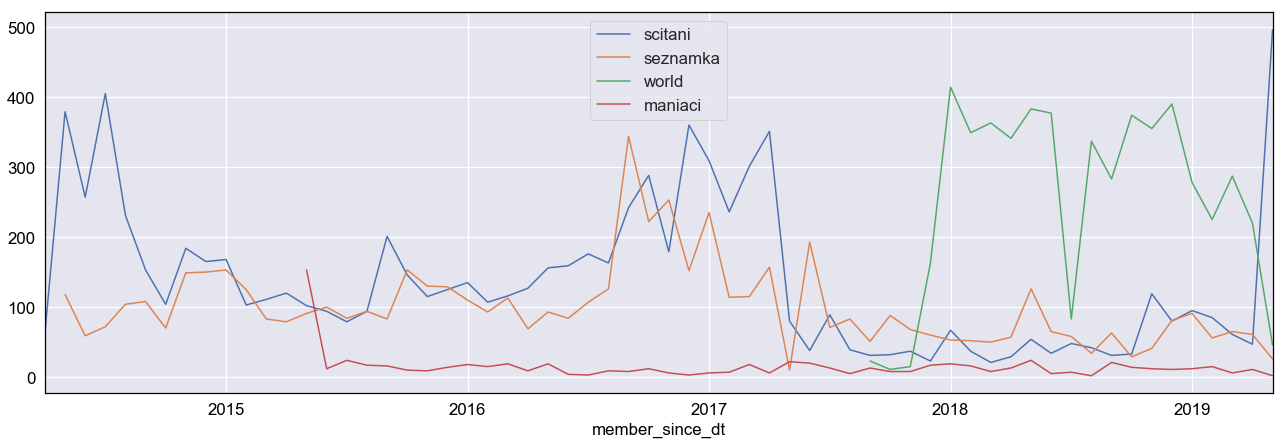

In [57]:
for group in df['group'].unique():
    first_joined[first_joined['group'] == group].groupby(pd.Grouper(freq='M'))['uid'].count().plot(figsize=(22, 7), label=group)
plt.legend()

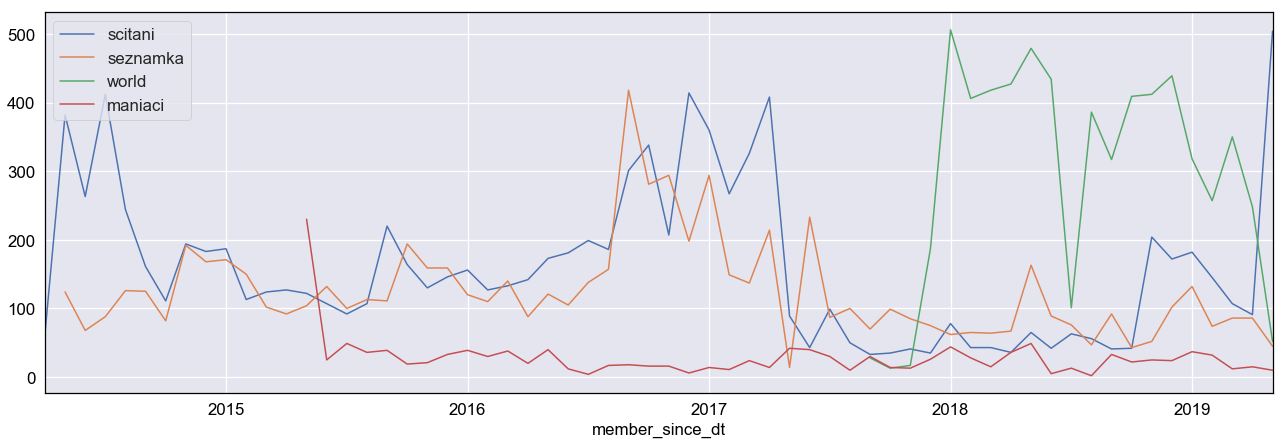

In [58]:
for group in df['group'].unique():
    df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='M'))['uid'].count().plot(figsize=(22, 7), label=group)
plt.legend()

In [59]:
df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count()

member_since_dt
2015-05-31    230
2015-08-31    110
2015-11-30     79
2016-02-29    102
2016-05-31     98
2016-08-31     33
2016-11-30     50
2017-02-28     31
2017-05-31     80
2017-08-31     80
2017-11-30     57
2018-02-28     98
2018-05-31    100
2018-08-31     20
2018-11-30     80
2019-02-28     93
2019-05-31     37
Freq: 3M, Name: uid, dtype: int64

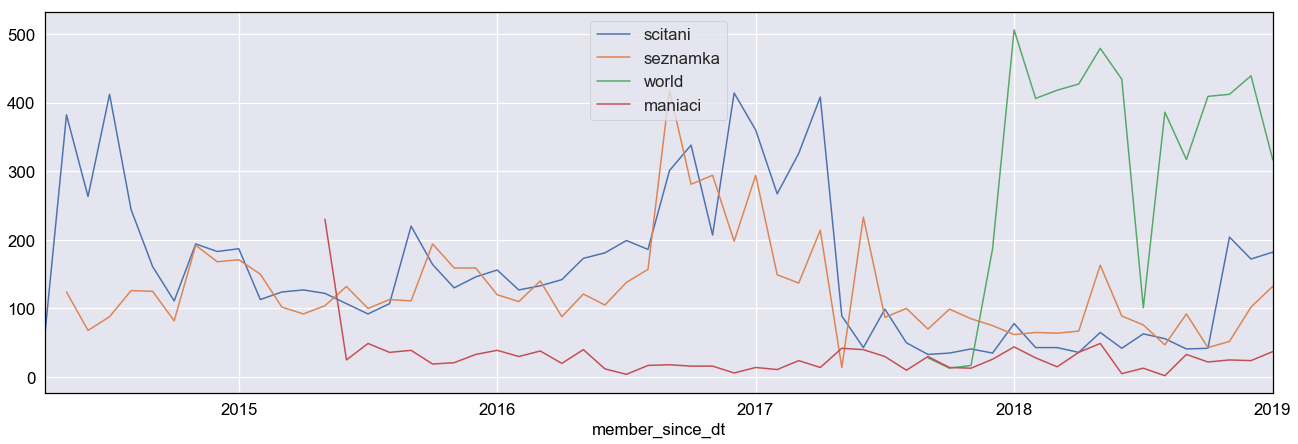

In [60]:
for group in df['group'].unique():
    df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='M'))['uid'].count().plot(figsize=(22, 7), label=group)
plt.xlim([None, date(2019, 1, 1)])
plt.legend()

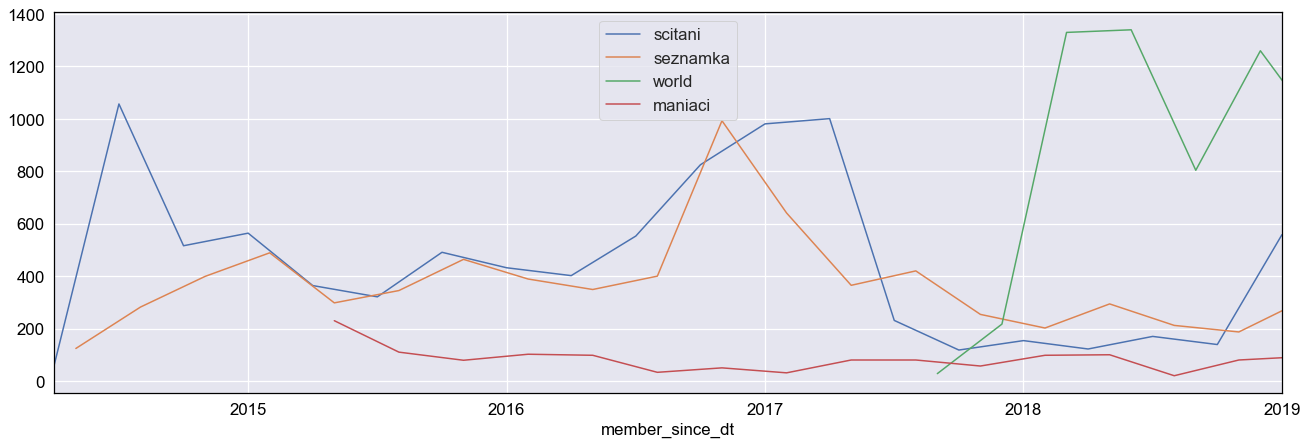

In [61]:
for group in df['group'].unique():
    df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count().plot(figsize=(22, 7), label=group)
plt.xlim([None, date(2019, 1, 1)])
plt.legend()

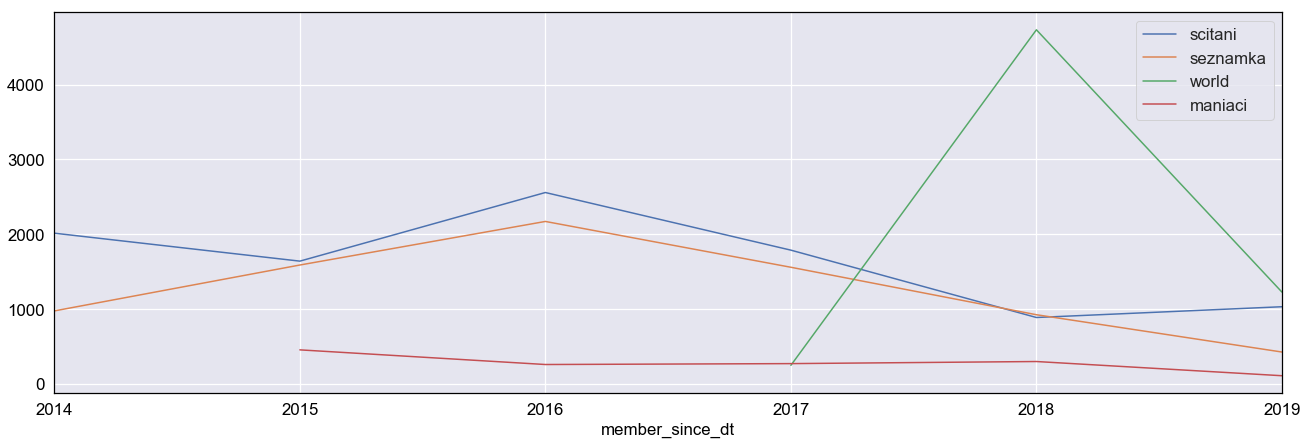

In [62]:
for group in df['group'].unique():
    df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='Y'))['uid'].count().plot(figsize=(22, 7), label=group)
plt.legend()

In [63]:
for group in df['group'].unique():
    display(df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='Y'))['uid'].count())

member_since_dt
2014-12-31    2013
2015-12-31    1639
2016-12-31    2557
2017-12-31    1786
2018-12-31     885
2019-12-31    1029
Freq: A-DEC, Name: uid, dtype: int64

member_since_dt
2014-12-31     973
2015-12-31    1587
2016-12-31    2170
2017-12-31    1557
2018-12-31     922
2019-12-31     423
Freq: A-DEC, Name: uid, dtype: int64

member_since_dt
2017-12-31     245
2018-12-31    4734
2019-12-31    1225
Freq: A-DEC, Name: uid, dtype: int64

member_since_dt
2015-12-31    452
2016-12-31    256
2017-12-31    268
2018-12-31    296
2019-12-31    106
Freq: A-DEC, Name: uid, dtype: int64

### calculating correlation with deaths

In [64]:
deaths = pd.read_csv('share-of-deaths-by-cause-2016.csv')
deaths.head()

Entity Code  Year  Cardiovascular diseases (%)  Cancers (%)  \
0  Afghanistan  AFG  1990                    23.707752     5.129907   
1  Afghanistan  AFG  1991                    23.490307     5.086501   
2  Afghanistan  AFG  1992                    23.146918     5.069537   
3  Afghanistan  AFG  1993                    21.154207     4.700073   
4  Afghanistan  AFG  1994                    19.756144     4.409522   

   Respiratory diseases (%)  Diabetes (%)  Dementia (%)  \
0                  3.036222      3.832555      0.999691   
1                  3.012502      3.822228      0.994872   
2                  2.975990      3.900125      0.970019   
3                  2.732570      3.974113      0.872878   
4                  2.566001      3.968954      0.807788   

   Lower respiratory infections (%)  Neonatal deaths (%)  ...  \
0                         11.644167             9.227290  ...   
1                         11.168168             9.187388  ...   
2                         11.110911             9.573838  ...   
3                         11.929438            11.533166  ...   
4                         12.547770            11.477337  ...   

   Alcohol disorders (%)  Intestinal infectious diseases (%)  \
0               0.038539                            0.183330   
1               0.038059                            0.178107   
2               0.038832                            0.176855   
3               0.036968                            0.173467   
4               0.034756                            0.165135   

   Drug disorders (%)  Hepatitis (%)  Fire (%)  \
0            0.039879       0.404331  0.158972   
1            0.040635       0.394017  0.155810   
2            0.043546       0.393992  0.162097   
3            0.043698       0.376810  0.161563   
4            0.042743       0.364885  0.160486   

   Heat-related (hot and cold exposure) (%)  Natural disasters (%)  \
0                                  0.115739               0.000000   
1                                  0.082479               0.676436   
2                                  0.044248               0.294514   
3                                  0.043968               0.046548   
4                                  0.043028               0.061585   

   Conflict (%)  Terrorism (%)  Diabetes mellitus (%)  
0         0.932          0.007               1.713669  
1         2.044          0.040               1.681392  
2         2.408          0.027               1.649107  
3           NaN            NaN               1.505131  
4         4.296          0.010               1.398301  

[5 rows x 36 columns]

In [65]:
deaths['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern 

In [66]:
def full_data_cols(deaths, country):
    country_data = deaths[deaths['Entity'] == country].set_index('Year').loc[2013:]
    cols = country_data.columns[country_data.isna().sum() == 0]
    return country_data[cols]

In [67]:
full_data_cols(deaths, 'Czech Republic')

Entity Code  Cardiovascular diseases (%)  Cancers (%)  \
Year                                                                  
2013  Czech Republic  CZE                    44.548015    26.598283   
2014  Czech Republic  CZE                    44.115000    26.443699   
2015  Czech Republic  CZE                    44.113126    26.091349   
2016  Czech Republic  CZE                    44.019354    26.085578   
2017  Czech Republic  CZE                    44.308731    26.177435   

      Respiratory diseases (%)  Dementia (%)  \
Year                                           
2013                  3.434291      6.367578   
2014                  3.518255      6.602601   
2015                  3.626937      6.694386   
2016                  3.602107      6.746190   
2017                  3.496604      6.860753   

      Lower respiratory infections (%)  Neonatal deaths (%)  \
Year                                                          
2013                          2.766332             0.129984   
2014                          2.821342             0.130397   
2015                          2.907029             0.127895   
2016                          2.955657             0.134256   
2017                          2.916318             0.107661   

      Diarrheal diseases (%)  Road incidents (%)  ...  Drowning (%)  \
Year                                              ...                 
2013                0.247033            0.845094  ...      0.194358   
2014                0.267503            0.823750  ...      0.187549   
2015                0.275340            0.805827  ...      0.184382   
2016                0.268459            0.789290  ...      0.180007   
2017                0.233717            0.772162  ...      0.175037   

      Maternal deaths (%)  Parkinson disease (%)  Alcohol disorders (%)  \
Year                                                                      
2013             0.005232               0.821143               0.414921   
2014             0.006238               0.836469               0.411076   
2015             0.005144               0.845734               0.409338   
2016             0.004637               0.851289               0.414261   
2017             0.005069               0.856106               0.403302   

      Drug disorders (%)  Hepatitis (%)  Fire (%)  \
Year                                                
2013            0.121104       0.021296  0.131738   
2014            0.123104       0.018971  0.135970   
2015            0.127617       0.017353  0.138094   
2016            0.128650       0.015404  0.138440   
2017            0.126768       0.015732  0.133098   

      Heat-related (hot and cold exposure) (%)  Natural disasters (%)  \
Year                                                                    
2013                                  0.144606               0.000924   
2014                                  0.142250               0.000000   
2015                                  0.142511               0.000000   
2016                                  0.141339               0.000000   
2017                                  0.135296               0.000000   

      Diabetes mellitus (%)  
Year                         
2013               2.461381  
2014               2.607186  
2015               2.729413  
2016               2.801274  
2017               2.676945  

[5 rows x 31 columns]

In [68]:
corr_df = pd.concat([df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='Y'))['uid'].count().rename(group) for group in df['group'].unique()], axis=1)
corr_df.index = corr_df.index.year
corr_df = corr_df.merge(full_data_cols(deaths, 'Czech Republic'), left_index=True, right_index=True)
#corr_df = corr_df.merge(full_data_cols(deaths, 'Slovakia'), left_index=True, right_index=True)
corrs = corr_df.corr()
pd.concat([corrs[corrs != 1.0].abs().idxmax(), corrs[corrs != 1.0].abs().max()], axis=1)

0  \
scitani                                                                Malaria (%)   
seznamka                                                        Kidney disease (%)   
world                                                                          NaN   
maniaci                                                              Hepatitis (%)   
Cardiovascular diseases (%)                                  Alcohol disorders (%)   
Cancers (%)                                                     Drug disorders (%)   
Respiratory diseases (%)                           Protein-energy malnutrition (%)   
Dementia (%)                                                    Road incidents (%)   
Lower respiratory infections (%)                               Maternal deaths (%)   
Neonatal deaths (%)                                    Cardiovascular diseases (%)   
Diarrheal diseases (%)                    Heat-related (hot and cold exposure) (%)   
Road incidents (%)                                                    Drowning (%)   
Liver disease (%)                                                      Suicide (%)   
Tuberculosis (%)                                                           maniaci   
Kidney disease (%)                                Lower respiratory infections (%)   
Digestive diseases (%)                                               Hepatitis (%)   
HIV/AIDS (%)                                                               maniaci   
Suicide (%)                                                  Parkinson disease (%)   
Malaria (%)                                                                scitani   
Homicide (%)                                                     Liver disease (%)   
Nutritional deficiencies (%)                       Protein-energy malnutrition (%)   
Meningitis (%)                                                        Dementia (%)   
Protein-energy malnutrition (%)                       Nutritional deficiencies (%)   
Drowning (%)                                                    Road incidents (%)   
Maternal deaths (%)                               Lower respiratory infections (%)   
Parkinson disease (%)                                                  Suicide (%)   
Alcohol disorders (%)                                  Cardiovascular diseases (%)   
Drug disorders (%)                                                     Cancers (%)   
Hepatitis (%)                                               Digestive diseases (%)   
Fire (%)                                               Cardiovascular diseases (%)   
Heat-related (hot and cold exposure) (%)                    Diarrheal diseases (%)   
Natural disasters (%)                                                          NaN   
Diabetes mellitus (%)                                                     seznamka   

                                                 1  
scitani                                   0.924153  
seznamka                                  0.971938  
world                                          NaN  
maniaci                                   0.994709  
Cardiovascular diseases (%)               0.985422  
Cancers (%)                               0.986730  
Respiratory diseases (%)                  0.947829  
Dementia (%)                              0.991174  
Lower respiratory infections (%)          0.998770  
Neonatal deaths (%)                       0.981200  
Diarrheal diseases (%)                    0.987778  
Road incidents (%)                        0.994014  
Liver disease (%)                         0.998840  
Tuberculosis (%)                          0.930106  
Kidney disease (%)                        0.997231  
Digestive diseases (%)                    0.997993  
HIV/AIDS (%)                              0.829064  
Suicide (%)                               0.999676  
Malaria (%)                               0.924153  
Homicide (%)                              0.990576  
Nutritional deficiencies (%)              0

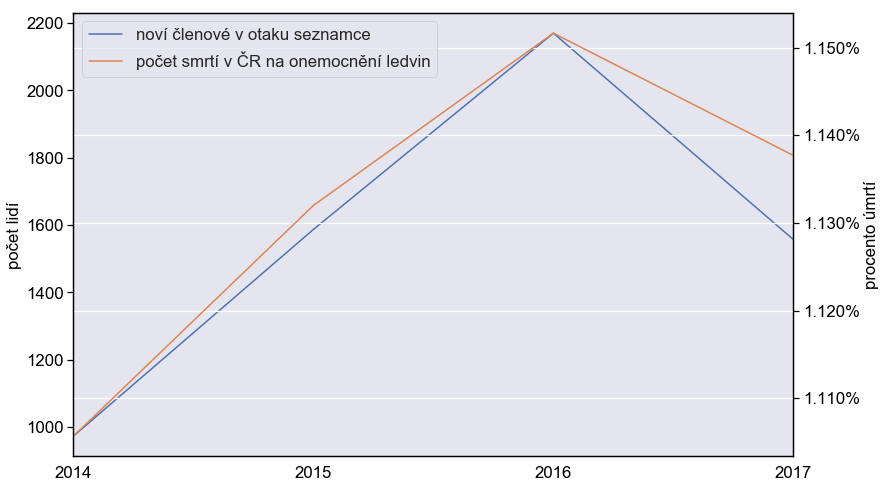

In [69]:
def finer_plot(ax1, ax2, ylabel_1, ylabel_2, y_precision=3):
    ax2.set_yticklabels(['{:,.{}%}'.format(x/100, y_precision) for x in ax2.get_yticks()])
    plt.legend(*list(zip(*[(h, l) for ax in fig.axes for h,l in zip(*ax.get_legend_handles_labels())])))
    plt.tight_layout()
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.set_ylabel(ylabel_1)
    ax2.set_ylabel(ylabel_2)
    
fig = plt.figure()
ax1 = corr_df['seznamka'].plot(label='noví členové v otaku seznamce')
ax2 = corr_df['Kidney disease (%)'].plot(secondary_y=True, label='počet smrtí v ČR na onemocnění ledvin')
finer_plot(ax1, ax2, 'počet lidí', 'procento úmrtí')
plt.savefig('imgs/korelace-seznamka-ledviny.png')

In [70]:
ax1.get_xticks().dtype, corr_df['Kidney disease (%)'].dtype

(dtype('float64'), dtype('float64'))

In [71]:
corr_df['Kidney disease (%)'].index

Int64Index([2014, 2015, 2016, 2017], dtype='int64')

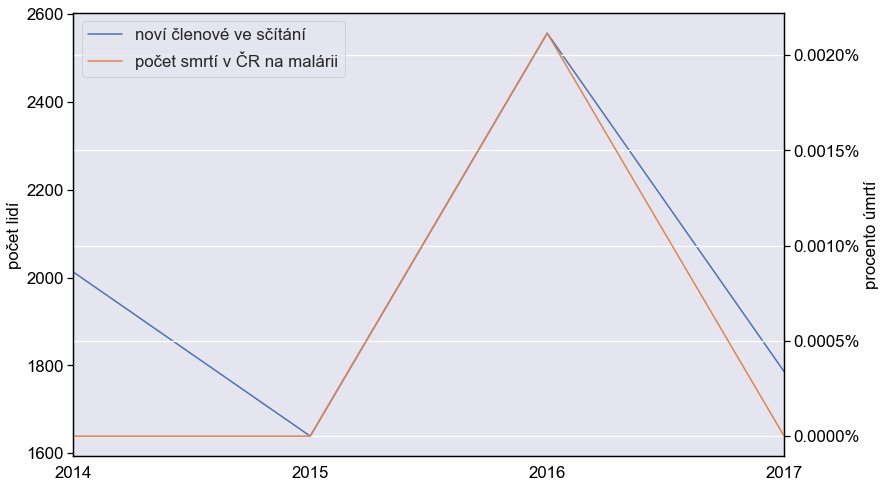

In [72]:
fig = plt.figure()
ax1 = corr_df['scitani'].plot(label='noví členové ve sčítání')
ax2 = corr_df['Malaria (%)'].plot(secondary_y=True, label='počet smrtí v ČR na malárii')
finer_plot(ax1, ax2, 'počet lidí', 'procento úmrtí', 4)
plt.savefig('imgs/korelace-scitani-malarie.png')

In [74]:
fig = plt.figure()
ax1 = corr_df['coven'].plot(label='noví členové v covenu')
ax2 = corr_df['Hepatitis (%)'].plot(secondary_y=True, label='počet smrtí na Slovensku na heptitidu')
ax2.set_yticklabels(['{:,.2%}'.format(x/100) for x in ax2.get_yticks()])
plt.legend(*list(zip(*[(h, l) for ax in fig.axes for h,l in zip(*ax.get_legend_handles_labels())])))
plt.tight_layout()
ax1.set_ylabel('počet lidí')
ax2.set_ylabel('procento úmrtí')
plt.savefig('imgs/korelace-coven-hepatitis.png')

KeyError: 'coven'

<Figure size 864x504 with 0 Axes>

In [75]:
[(h, l) for ax in fig.axes for h,l in zip(*ax.get_legend_handles_labels())]

[]

In [76]:
[(h, l) for ax in fig.axes for h,l in zip(*ax.get_legend_handles_labels()) ]

[]

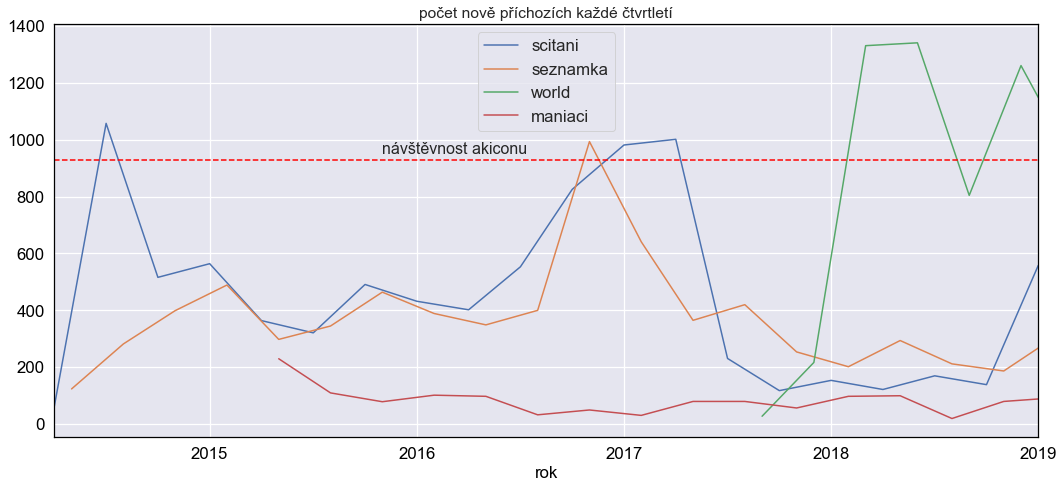

In [77]:
for group in df_no_coven['group'].unique():
    df_no_coven[(df_no_coven['group'] == group) & df_no_coven['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count().plot(figsize=(15, 7), label=group)
plt.legend()
plt.xlabel('rok')
plt.axhline(930, linestyle='--', color='red')
plt.text(550, 950, 'návštěvnost akiconu', fontsize=16)
plt.title('počet nově příchozích každé čtvrtletí')
plt.xlim([None, date(2019, 1, 1)])
plt.tight_layout()
plt.savefig('imgs/nove-prichozi-3m.png')

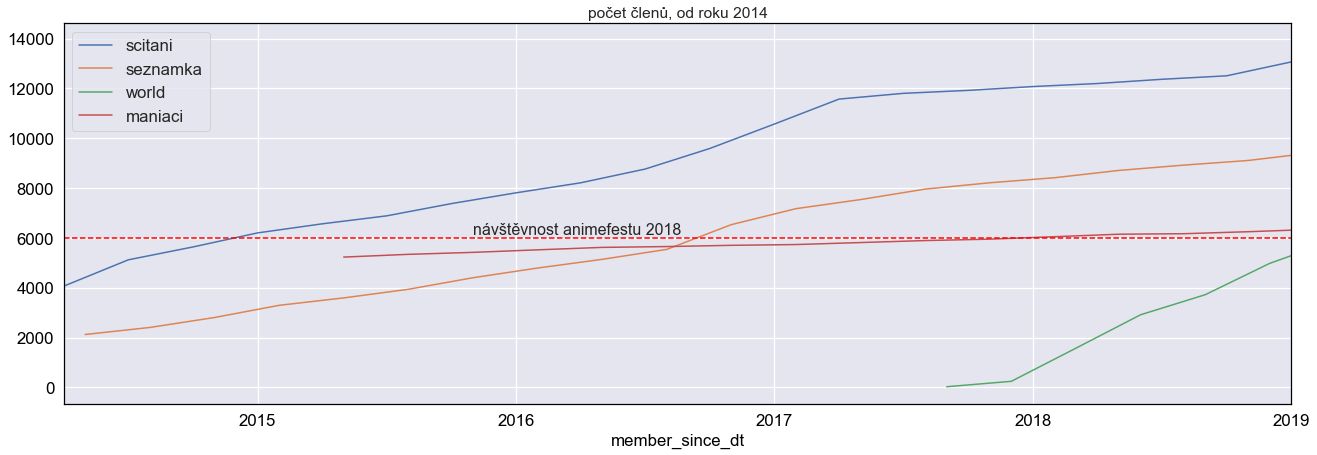

In [78]:
offsets = {'scitani': 4000, 'seznamka': 2000, 'world': 0, 'maniaci': 5000}
for group in df['group'].unique():
    (df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count().cumsum() + offsets[group]).plot(figsize=(22, 7), label=group)
plt.axhline(6000, linestyle='--', color='red')
plt.text(550, 6150, 'návštěvnost animefestu 2018', fontsize=16)
plt.xlim([None, date(2019, 1, 1)])
plt.title('počet členů, od roku 2014')
plt.legend()

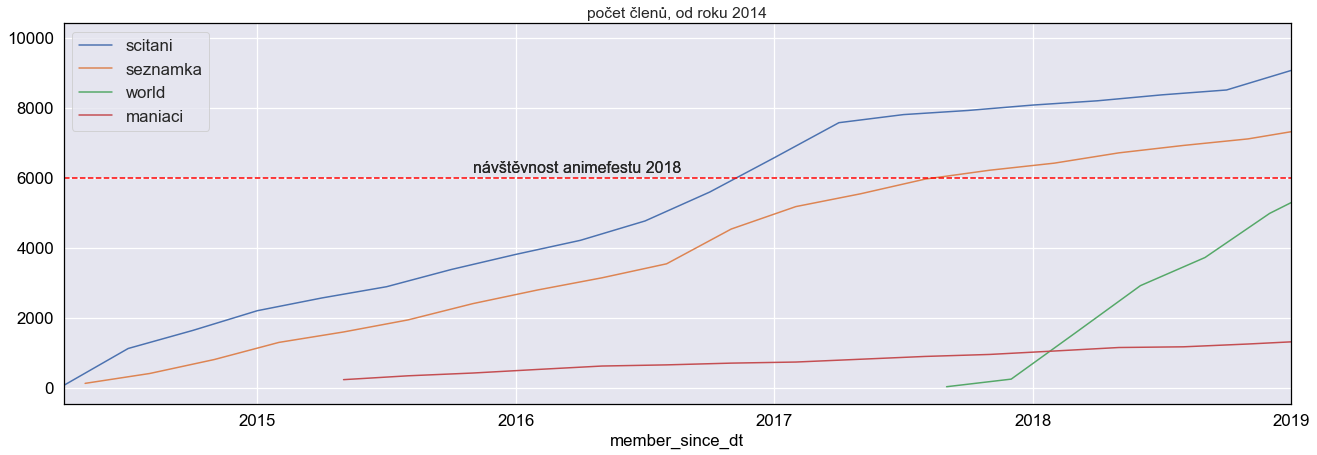

In [81]:
for group in df['group'].unique():
    df[(df['group'] == group) & df['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count().cumsum().plot(figsize=(22, 7), label=group)
plt.axhline(6000, linestyle='--', color='red')
plt.text(550, 6150, 'návštěvnost animefestu 2018', fontsize=16)
plt.text(550, 6150, 'návštěvnost animefestu 2018', fontsize=16)
plt.xlim([None, date(2019, 1, 1)])
plt.title('počet členů, od roku 2014')
plt.legend()

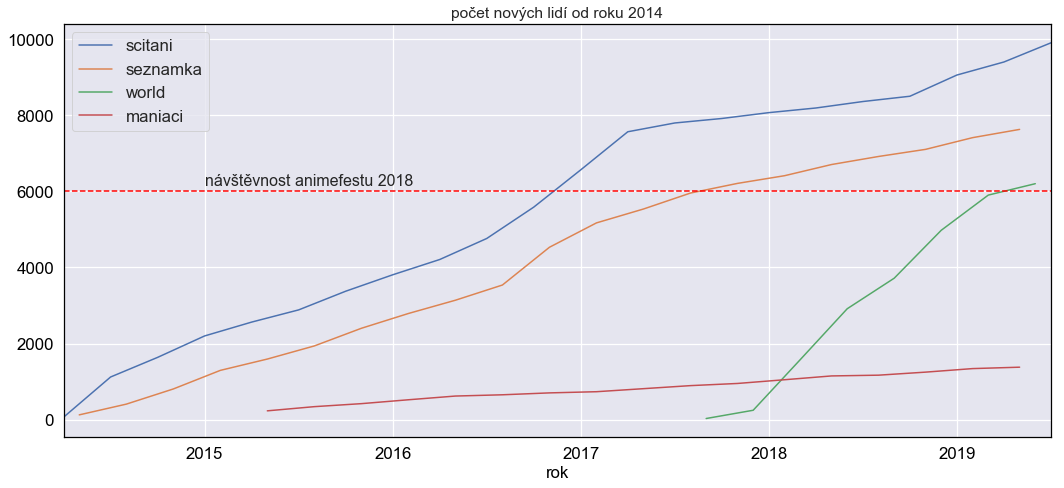

In [80]:
for group in df_no_coven['group'].unique():
    df_no_coven[(df_no_coven['group'] == group) & df_no_coven['member_since_dt'].notnull()].set_index('member_since_dt').groupby(pd.Grouper(freq='3M'))['uid'].count().cumsum().plot(figsize=(15, 7), label=group)
plt.legend()
plt.xlabel('rok')
plt.axhline(6000, linestyle='--', color='red')
plt.text(540, 6150, 'návštěvnost animefestu 2018', fontsize=16)
plt.title('počet nových lidí od roku 2014')
plt.tight_layout()
plt.savefig('imgs/cumsum-prichozi-3m.png')